In [10]:
%load_ext autoreload
%autoreload 2

In [115]:
import pandas as pd
from rdkit import Chem
from sigma import SigmaCalculator, gen_3d
from tqdm.auto import tqdm

In [41]:
tqdm.pandas()

## dhm

Read the data

In [155]:
df_dhm = pd.read_excel("dhm at tm-1_11_22.xlsx")

In [156]:
df_dhm.shape

(4541, 17)

In [165]:
df_dhm['mol'] = df_dhm.smile.apply(smi2mol_with_errors)

In [170]:
df_dhm[['mol','err']] = df_dhm.smile.apply(smi2mol_with_errors).to_list()

In [169]:
df_dhm.query("err != ''")

,CAS,Name_x,dhm at Tm,Tm,dhm at Tm average,dsm average,dhm at Tm median,dsm median,dhm at Tm SD,Tm average,Tm median,Tm SD,smile,source,dh source,Temp source,Formula,mol,err
1251,[000-06-3],"trans,cis-2,6-octadiene-1,8-dioic acid",22.78,380,22.780,59.947368,22.780,59.947368,0.0,380.0,380.0,0.0,C/C(=C\CO)/CC/C=C(\C)\CO,jain 2004,keshavarz 2020,keshavarz 2020,C8H10O4,<rdkit.Chem.rdchem.Mol object at 0x126a1eb80>,RDKit WARNING: [10:56:51] Conflicting single b...
1468,[000-45-1],"trans,cis-2,6-octadiene-1,8-dioic acid",22.8,380,22.800,60.000000,22.800,60.000000,0.0,380.0,380.0,0.0,C/C(=C\CO)/CC/C=C(\C)\CO,jain akash 2005,keshavarz 2020,keshavarz 2020,NaN,<rdkit.Chem.rdchem.Mol object at 0x126a27e20>,RDKit WARNING: [10:56:51] Conflicting single b...
1531,100-63-0,phenylhydrazine,"[16.43, 16.4]","[292.8, 292.8]",16.415,56.062158,16.415,56.062158,0.0,292.8,292.8,0.0,[H+].[Cl-].NNc1ccccc1,"['jain 2004', 'jain akash 2005']","['jain 2004', 'jain akash 2005']","['jain 2004', 'jain akash 2005']",C6H8N2,<rdkit.Chem.rdchem.Mol object at 0x126a2a640>,RDKit WARNING: [10:56:51] WARNING: not removin...
1925,123-75-1,pyrrolidine,"[9.12, 9.1]","[215.3, 215.3]",9.110,42.313052,9.110,42.313052,0.0,215.3,215.3,0.0,[H+].[Cl-].C1CCNC1,"['jain 2004', 'jain akash 2005']","['jain 2004', 'jain akash 2005']","['jain 2004', 'jain akash 2005']",C4H9N,<rdkit.Chem.rdchem.Mol object at 0x126a39c40>,RDKit WARNING: [10:56:51] WARNING: not removin...


Add a molecule column

In [88]:
df_dhm['mol'] = [Chem.MolFromSmiles(x) for x in df_dhm.smile]

RDKit WARNING: [14:34:02] Conflicting single bond directions around double bond at index 7.
[14:34:02] Conflicting single bond directions around double bond at index 7.
RDKit WARNING: [14:34:02]   BondStereo set to STEREONONE and single bond directions set to NONE.
[14:34:02]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [14:34:02] Conflicting single bond directions around double bond at index 7.
[14:34:02] Conflicting single bond directions around double bond at index 7.
RDKit WARNING: [14:34:02]   BondStereo set to STEREONONE and single bond directions set to NONE.
[14:34:02]   BondStereo set to STEREONONE and single bond directions set to NONE.
RDKit WARNING: [14:34:02] WARNING: not removing hydrogen atom without neighbors
[14:34:02] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:34:02] WARNING: not removing hydrogen atom without neighbors
[14:34:02] WARNING: not removing hydrogen atom without neighbors


Calculate the number of atoms

In [89]:
df_dhm['num_atoms'] = [x.GetNumAtoms() for x in df_dhm.mol]

Remove structures with < 4 atoms

In [90]:
df_dhm_ok = df_dhm.query("num_atoms >= 4").copy()

In [95]:
print(f"{len(df_dhm) - len(df_dhm_ok)} structures with < 4 atoms removed")

39 structures with < 4 atoms removed


In [96]:
df_dhm_ok['sigma_orig'] = df_dhm_ok.mol.progress_apply(sigma_calc.calc_sigma_original)

  0%|          | 0/4502 [00:00<?, ?it/s]

In [122]:
df_dhm_ok['sigma_new'] = df_dhm_ok.mol.progress_apply(sigma_calc.calc_sigma_new)

  0%|          | 0/4502 [00:00<?, ?it/s]

Failed to generate a 3D structure for CCCCCCCCCCc1cc2c3cc(CCCCCCCCCC)c(CCCCCCCCCC)cc3c3cc(CCCCCCCCCC)c(CCCCCCCCCC)cc3c2cc1CCCCCCCCCC
RDKit WARNING: [08:05:23] WARNING: not removing hydrogen atom without neighbors
[08:05:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [08:05:23] WARNING: not removing hydrogen atom without neighbors
[08:05:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [08:05:23] WARNING: not removing hydrogen atom without neighbors
[08:05:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [08:05:23] WARNING: not removing hydrogen atom without neighbors
[08:05:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [08:05:23] WARNING: not removing hydrogen atom without neighbors
[08:05:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [08:05:23] WARNING: not removing hydrogen atom without neighbors
[08:05:23] WARNING: not removing hydrogen atom without neighbo

## dhv

In [80]:
df_dhv = pd.read_excel("dhv at tb-1_11_12.xlsx")

In [81]:
df_dhv['mol'] = [Chem.MolFromSmiles(x) for x in df_dhv.smile]

RDKit WARNING: [14:32:28] Conflicting single bond directions around double bond at index 3.
[14:32:28] Conflicting single bond directions around double bond at index 3.
RDKit WARNING: [14:32:28]   BondStereo set to STEREONONE and single bond directions set to NONE.
[14:32:28]   BondStereo set to STEREONONE and single bond directions set to NONE.


In [82]:
df_dhv['num_atoms'] = [x.GetNumAtoms() for x in df_dhv.mol]

In [83]:
df_dhv_ok = df_dhv.query("num_atoms >= 4").copy()

In [94]:
print(f"{len(df_dhv) - len(df_dhv_ok)} structures with < 4 atoms removed")

42 structures with < 4 atoms removed


In [84]:
sigma_calc = SigmaCalculator()

In [85]:
df_dhv_ok['sigma_orig'] = df_dhv_ok.mol.progress_apply(sigma_calc.calc_sigma_original)

  0%|          | 0/3064 [00:00<?, ?it/s]

In [123]:
df_dhv_ok['sigma_new'] = df_dhv_ok.mol.progress_apply(sigma_calc.calc_sigma_new)

  0%|          | 0/3064 [00:00<?, ?it/s]

In [129]:
import sys
from io import StringIO

In [130]:
def smi2mol_with_errors(smi):
    sio = sys.stderr = StringIO()
    mol = Chem.MolFromSmiles(smi)
    err = sio.getvalue()
    sio = sys.stderr = StringIO()
    sys.stderr = sys.__stderr__
    return mol, err

In [149]:
res = df_dhm_ok.smile.apply(smi2mol_with_errors)

In [150]:
err_df = pd.DataFrame([list(x) for x in res],columns=['ROMol',"error"])

In [152]:
err_df.query("error != ''")

,ROMol,error
1237,<rdkit.Chem.rdchem.Mol object at 0x1264296a0>,RDKit WARNING: [10:40:37] Conflicting single b...
1454,<rdkit.Chem.rdchem.Mol object at 0x126443940>,RDKit WARNING: [10:40:37] Conflicting single b...
1517,<rdkit.Chem.rdchem.Mol object at 0x126425160>,RDKit WARNING: [10:40:37] WARNING: not removin...
1910,<rdkit.Chem.rdchem.Mol object at 0x12643e700>,RDKit WARNING: [10:40:37] WARNING: not removin...


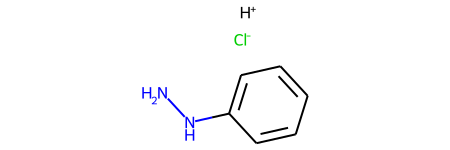

In [154]:
err_df.ROMol.values[1517]

In [171]:
!pwd

/Users/pwalters/modsource/python/rdkit/symmetry_sigma
